In [335]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score

In [4]:
df = pd.read_csv('water_potability.csv')
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [5]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

### Imputing Missing Values

In [6]:
df_final = df.copy()

In [7]:
df_final['Trihalomethanes'] = df_final['Trihalomethanes'].fillna(df['Trihalomethanes'].mean())

In [8]:
df_final.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes      0
Turbidity            0
Potability           0
dtype: int64

In [9]:
from sklearn.impute import KNNImputer
imputer_knn = KNNImputer(n_neighbors=5)

In [10]:
df_final

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [11]:
df_final = pd.DataFrame(imputer_knn.fit_transform(df_final), columns=df.columns)

In [12]:
df_final

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.156857,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0.0
1,3.716080,129.422921,18630.057858,6.635246,336.094350,592.885359,15.180013,56.329076,4.500656,0.0
2,8.099124,224.236259,19909.541732,9.275884,330.449166,418.606213,16.868637,66.420093,3.055934,0.0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0.0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0.0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1.0
3272,7.808856,193.553212,17329.802160,8.061362,364.091541,392.449580,19.903225,66.396293,2.798243,1.0
3273,9.419510,175.762646,33155.578218,7.350233,327.357588,432.044783,11.039070,69.845400,3.298875,1.0
3274,5.126763,230.603758,11983.869376,6.303357,325.952434,402.883113,11.168946,77.488213,4.708658,1.0


In [13]:
df_final.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [14]:
df_final['Potability'].value_counts(normalize=True)

0.0    0.60989
1.0    0.39011
Name: Potability, dtype: float64

### Visualization

In [15]:
df_final.head(1)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.156857,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.99097,2.963135,0.0


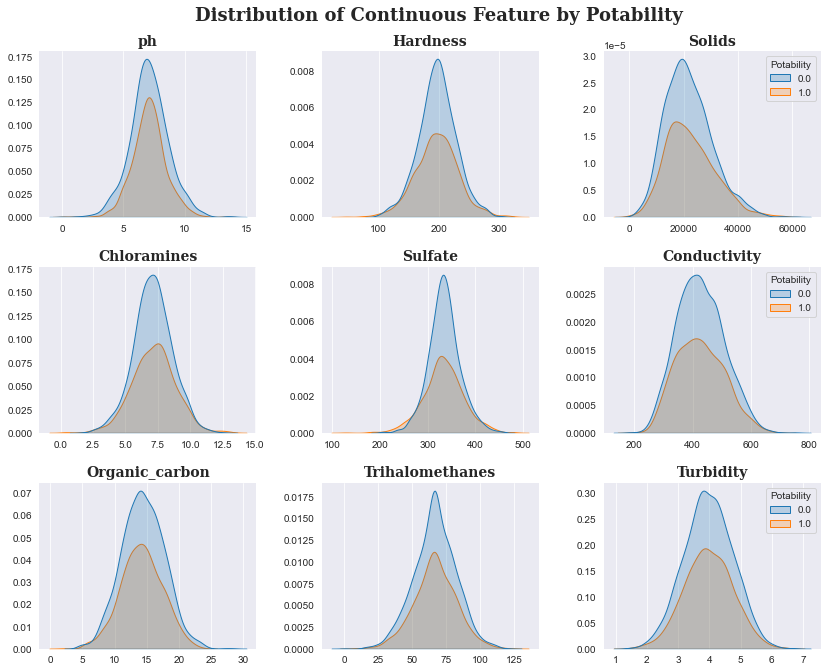

In [21]:
sns.set_style(style='darkgrid')

fig = plt.figure(figsize=(14, 11))
gs = fig.add_gridspec(3, 3)
gs.update(wspace=0.3, hspace=0.3)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0, 2])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[1, 2])
ax6 = fig.add_subplot(gs[2, 0])
ax7 = fig.add_subplot(gs[2, 1])
ax8 = fig.add_subplot(gs[2, 2])
axes = [ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]

#fig.patch.set_facecolor(background_color)


# Title
ax1.text(200, 0.011, 'Distribution of Continuous Feature by Potability',
        fontsize=18, fontfamily='serif', fontweight='bold',
        horizontalalignment='center',
        verticalalignment='center')


# Graphs
for i, ax in enumerate(axes):
    dp_legend = False
    if i in [2, 5, 8]:
        dp_legend = True
        
    #ax.set_facecolor(background_color)
    ax.set_title(df.columns[i], fontsize=14, fontfamily='serif', fontweight='bold')
    ax.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
    
    sns.kdeplot(x=df_final.columns[i], hue='Potability', data=df_final, fill=True, ax=ax, legend=dp_legend)
    ax.set_xlabel('')
    ax.set_ylabel('')
    
    for s in ['top', 'right', 'left']:
        ax.spines[s].set_visible(False)

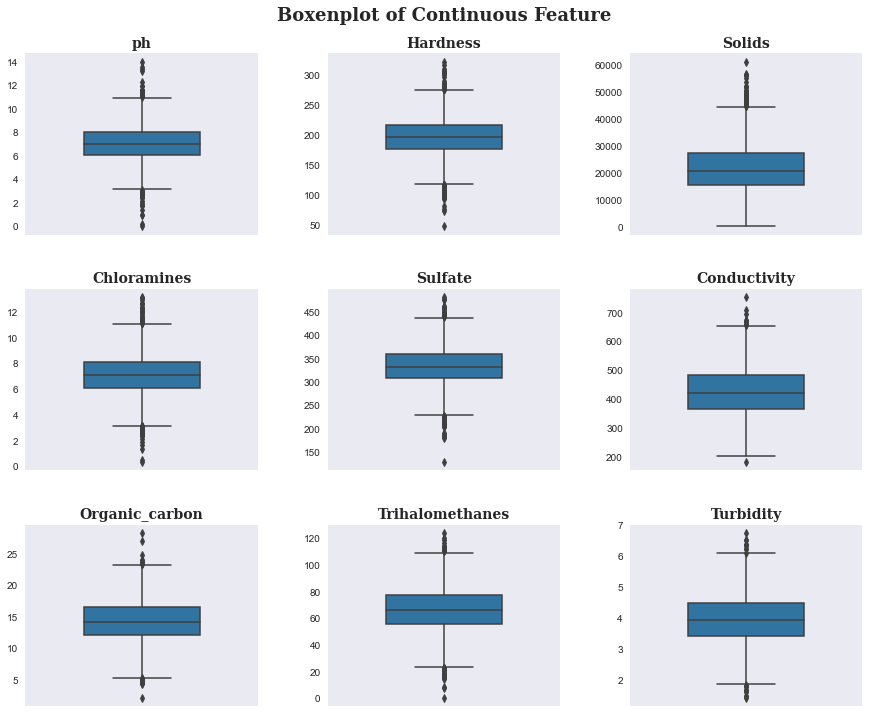

In [29]:
fig = plt.figure(figsize=(15, 12))
gs = fig.add_gridspec(3, 3)
gs.update(wspace=0.3, hspace=0.3)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0, 2])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[1, 2])
ax6 = fig.add_subplot(gs[2, 0])
ax7 = fig.add_subplot(gs[2, 1])
ax8 = fig.add_subplot(gs[2, 2])
axes = [ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]

#fig.patch.set_facecolor(background_color)

# Title
ax1.text(0, 400, 'Boxenplot of Continuous Feature',
        fontsize=18, fontfamily='serif', fontweight='bold',
        horizontalalignment='center',
        verticalalignment='center')


# Graphs
for i, ax in enumerate(axes):
    #ax.set_facecolor(background_color)
    ax.set_title(df.columns[i], fontsize=14, fontfamily='serif', fontweight='bold')
    ax.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
    
    sns.boxplot(y=df.columns[i], data=df, ax=ax, width=0.5)
    ax.set_xlabel('')
    ax.set_ylabel('')
    
    for s in ['top', 'right', 'left']:
        ax.spines[s].set_visible(False)

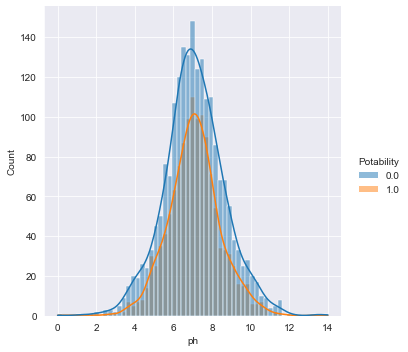

In [107]:
sns.set_style(style='darkgrid')

sns.displot(data=df_final, x='ph', kde=True, hue='Potability')

<AxesSubplot:xlabel='ph'>

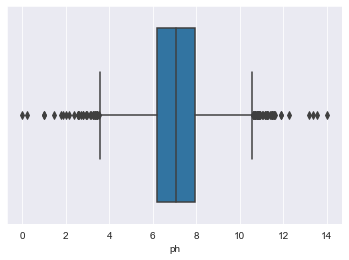

In [110]:
sns.boxplot(data=df_final, x='ph', hue='Potability')

<AxesSubplot:xlabel='ph'>

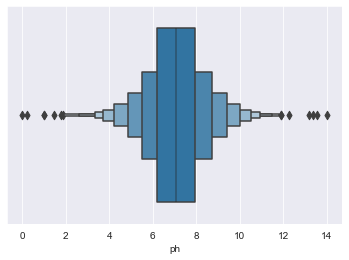

In [111]:
sns.boxenplot(data=df_final, x='ph', hue='Potability')

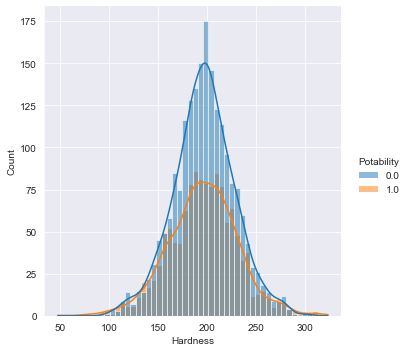

In [52]:
sns.displot(data=df_final, x='Hardness', kde=True, hue='Potability')

<AxesSubplot:xlabel='Hardness'>

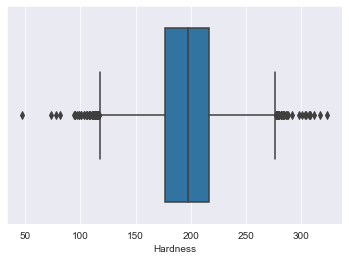

In [112]:
sns.boxplot(data=df_final, x='Hardness', hue='Potability')

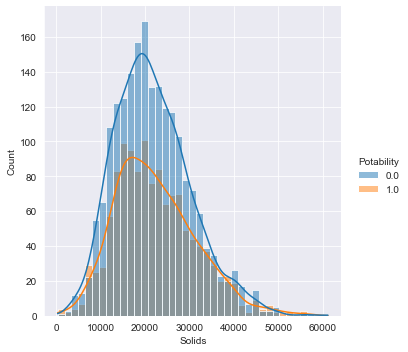

In [53]:
sns.displot(data=df_final, x='Solids', kde=True, hue='Potability')

<AxesSubplot:xlabel='Solids'>

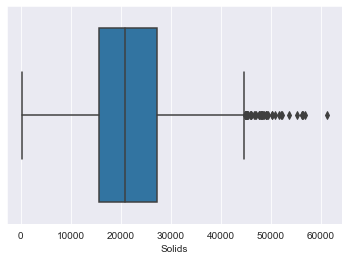

In [115]:
sns.boxplot(data=df_final, x='Solids', hue='Potability')

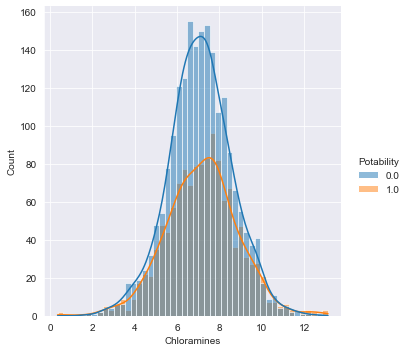

In [54]:
sns.displot(data=df_final, x='Chloramines', kde=True, hue='Potability')

<AxesSubplot:xlabel='Chloramines'>

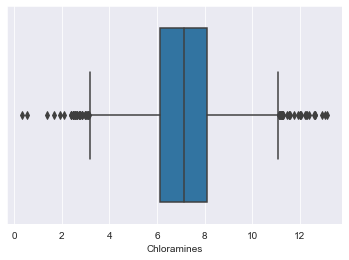

In [116]:
sns.boxplot(data=df_final, x='Chloramines', hue='Potability')

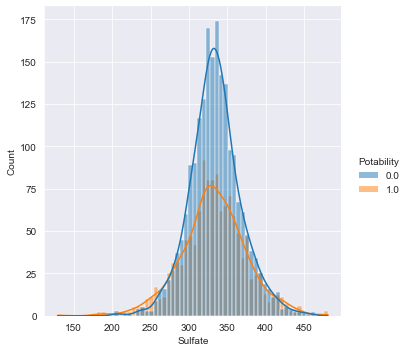

In [55]:
sns.displot(data=df_final, x='Sulfate', kde=True, hue='Potability')

<AxesSubplot:xlabel='Sulfate'>

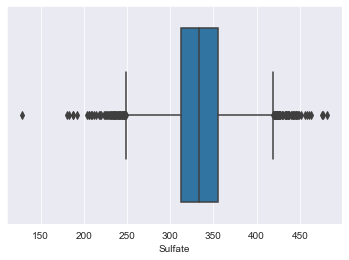

In [117]:
sns.boxplot(data=df_final, x='Sulfate', hue='Potability')

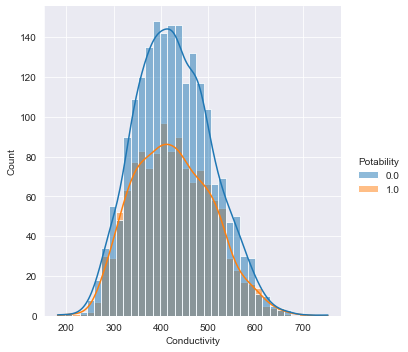

In [56]:
sns.displot(data=df_final, x='Conductivity', kde=True, hue='Potability')

<AxesSubplot:xlabel='Conductivity'>

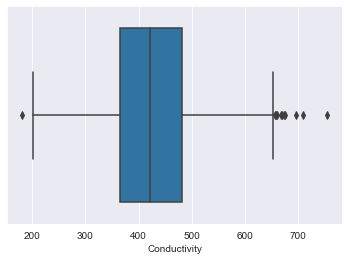

In [121]:
sns.boxplot(data=df_final, x='Conductivity', hue='Potability')

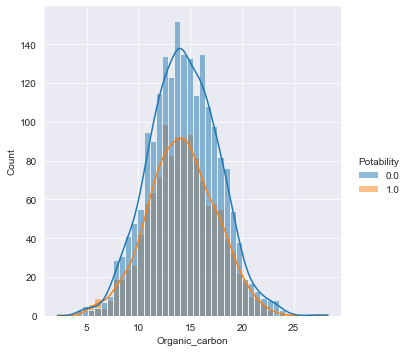

In [59]:
sns.displot(data=df_final, x='Organic_carbon', kde=True, hue='Potability')

<AxesSubplot:xlabel='Organic_carbon'>

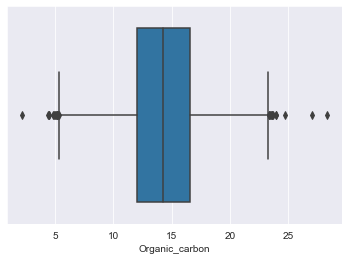

In [122]:
sns.boxplot(data=df_final, x='Organic_carbon', hue='Potability')

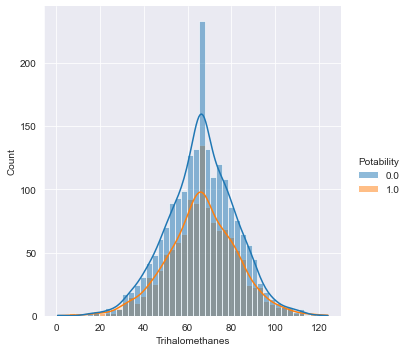

In [61]:
sns.displot(data=df_final, x='Trihalomethanes', kde=True, hue='Potability')

<AxesSubplot:xlabel='Trihalomethanes'>

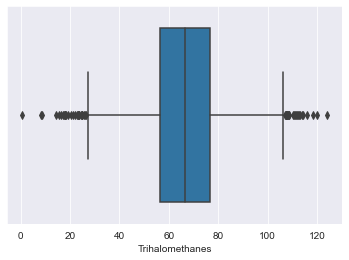

In [123]:
sns.boxplot(data=df_final, x='Trihalomethanes', hue='Potability')

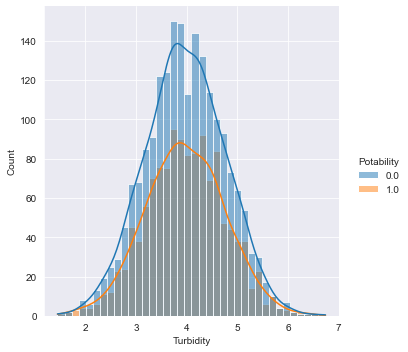

In [62]:
sns.displot(data=df_final, x='Turbidity', kde=True, hue='Potability')

<AxesSubplot:xlabel='Turbidity'>

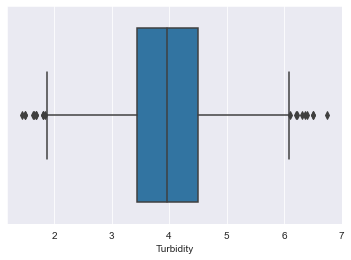

In [124]:
sns.boxplot(data=df_final, x='Turbidity', hue='Potability')

### Finding Number of Outliers and removing them

In [30]:
Q1 = df_final.quantile(0.25)
Q3 = df_final.quantile(0.75)
IQR = Q3 - Q1

In [31]:
((df_final < (Q1 - 1.5 * IQR)) | (df_final > (Q3 + 1.5 * IQR))).sum()

ph                  79
Hardness            83
Solids              47
Chloramines         61
Sulfate            114
Conductivity        11
Organic_carbon      25
Trihalomethanes     54
Turbidity           19
Potability           0
dtype: int64

In [32]:
df_final_out = df_final[~((df_final < (Q1 - 1.5 * IQR)) |(df_final > (Q3 + 1.5 * IQR))).any(axis=1)]

In [33]:
((df_final_out < (Q1 - 1.5 * IQR)) | (df_final_out > (Q3 + 1.5 * IQR))).sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [34]:
df_final.shape, df_final_out.shape

((3276, 10), (2842, 10))

### Scaling the features and Train Test Split

In [35]:
from sklearn.preprocessing import StandardScaler
scaler_st = StandardScaler()

In [36]:
X = df_final_out.drop(columns=['Potability'])
Y = df_final_out.Potability

In [37]:
X = pd.DataFrame(scaler_st.fit_transform(X), columns=df_final_out.columns[:-1])
X.sample(3)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
1324,0.374803,0.487096,-0.986608,1.013477,2.641503,-0.915972,-1.232653,-1.422321,-0.791558
2499,-2.157540,0.165066,-1.054987,-0.119801,1.279691,-0.286810,2.654398,0.675587,0.674053
841,0.901354,-0.720549,-1.454534,-1.494974,-0.293858,-1.540682,-1.009195,0.336906,-0.032839


In [45]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

### Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression
logres = LogisticRegression()

In [47]:
logres.fit(x_train, y_train)

LogisticRegression()

In [48]:
pred_logres = logres.predict(x_test)

In [49]:
logres.score(x_test,y_test)

0.6309314586994728

In [50]:
cross_val_score(logres,x_test, y_test)

array([0.60526316, 0.59649123, 0.61403509, 0.60526316, 0.62831858])

### KNN

In [51]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [52]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [53]:
pred_knn = knn.predict(x_test)

In [54]:
knn.score(x_test,y_test)

0.6344463971880492

In [55]:
cross_val_score(knn,x_test, y_test)

array([0.57894737, 0.5877193 , 0.5877193 , 0.56140351, 0.5840708 ])

### Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [57]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [58]:
rfc_random = RandomizedSearchCV(estimator=rfc, param_distributions=random_grid, n_iter=10 , cv=5 , verbose=2, random_state=42, n_jobs=2)

In [59]:
rfc_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=2,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, verbose=2)

In [60]:
rfc_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [68]:
rfc_random.best_score_, rfc_random.score(x_test, y_test)

(0.6691571864259089, 0.6625659050966608)

In [65]:
rfc_tuned = RandomForestClassifier(n_estimators=700, min_samples_split=15, min_samples_leaf=1, max_features='auto', max_depth=20)
rfc_tuned.fit(x_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_split=15, n_estimators=700)

In [69]:
cross_val_score(rfc_tuned,x_test, y_test)

array([0.61403509, 0.61403509, 0.60526316, 0.60526316, 0.57522124])

In [337]:
fpr, tpr, threshold = roc_curve(y_test, rfc_random.predict_proba(x_test)[:,1])

0.6303223239156386

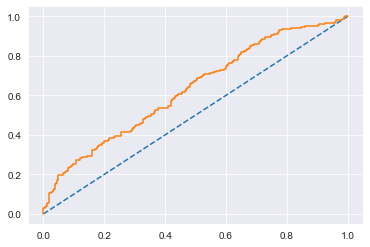

In [338]:
plt.plot([0,1],[0,1], linestyle = '--')
plt.plot(fpr, tpr)
roc_auc_score(y_test, rfc_random.predict_proba(x_test)[:,1])

### NN Implementation

In [339]:
import torch
from torch import nn
from torch.utils.data import DataLoader
import torch.nn.functional as F
from tqdm.notebook import tqdm

In [340]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [341]:
class water_data(DataLoader):
    def __init__(self,x,y):
        self.x = torch.tensor(x.values)
        self.y = torch.tensor(y.values)
        self.length = x.shape[0]
                             
    def __len__(self):
        return self.length

    def __getitem__(self, index):
        return self.x[index], self.y[index]

In [342]:
dataloaders = {'train': DataLoader(water_data(x_train, y_train), batch_size=10, shuffle=True),
                'test':  DataLoader(water_data(x_test, y_test), batch_size=10, shuffle=True)
               }

In [343]:
class nn_model(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(9,18)
        self.fc2 = nn.Linear(18,36)
        self.fc3 = nn.Linear(36,64)
        self.fc4 = nn.Linear(64,64)
        self.fc5 = nn.Linear(64,2)
    
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.fc5(x)
        return x

In [352]:
nn_mod = nn_model()
nn_mod.to(device)

nn_model(
  (fc1): Linear(in_features=9, out_features=18, bias=True)
  (fc2): Linear(in_features=18, out_features=36, bias=True)
  (fc3): Linear(in_features=36, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=64, bias=True)
  (fc5): Linear(in_features=64, out_features=2, bias=True)
)

In [353]:
import torch.optim as optim
optimizer = optim.Adam(nn_mod.parameters(), lr = 0.0005)
criterion = nn.CrossEntropyLoss()

In [354]:
EPOCHS = 50
train_loss = []
for epoch in tqdm(range(EPOCHS)):
    for x, y in dataloaders['train']:
        x = x.to(device)
        y = y.to(device)
        nn_mod.zero_grad()
        
        prediction = nn_mod(x.float())
        loss = criterion(prediction, y.long())
        loss.backward()
        optimizer.step()
        
    print("EPOCH", epoch)
    print('training_loss: ', loss)
    train_loss.append(loss)      

  0%|          | 0/50 [00:00<?, ?it/s]

EPOCH 0
training_loss:  tensor(0.7928, device='cuda:0', grad_fn=<NllLossBackward>)
EPOCH 1
training_loss:  tensor(0.6526, device='cuda:0', grad_fn=<NllLossBackward>)
EPOCH 2
training_loss:  tensor(0.6440, device='cuda:0', grad_fn=<NllLossBackward>)
EPOCH 3
training_loss:  tensor(0.6288, device='cuda:0', grad_fn=<NllLossBackward>)
EPOCH 4
training_loss:  tensor(0.7745, device='cuda:0', grad_fn=<NllLossBackward>)
EPOCH 5
training_loss:  tensor(0.5264, device='cuda:0', grad_fn=<NllLossBackward>)
EPOCH 6
training_loss:  tensor(0.6432, device='cuda:0', grad_fn=<NllLossBackward>)
EPOCH 7
training_loss:  tensor(1.0686, device='cuda:0', grad_fn=<NllLossBackward>)
EPOCH 8
training_loss:  tensor(0.4718, device='cuda:0', grad_fn=<NllLossBackward>)
EPOCH 9
training_loss:  tensor(1.0561, device='cuda:0', grad_fn=<NllLossBackward>)
EPOCH 10
training_loss:  tensor(0.9239, device='cuda:0', grad_fn=<NllLossBackward>)
EPOCH 11
training_loss:  tensor(0.3749, device='cuda:0', grad_fn=<NllLossBackward>)
EP

In [355]:
# Training Loop
correct = 0
total = 0

ground_truth = []
predicted_results = []
predicted_results_probfor1 = []
m = nn.Softmax(dim=1)

with torch.no_grad():
    for x, y in dataloaders['test']:
        x, y = x.to(device), y.to(device)

        prediction = nn_mod(x.float())
        pred_prob = m(prediction)

        for k in range(len(prediction)):
            ground_truth.append(y[k].item())
            predicted_results_probfor1.append(pred_prob[k][1].item())
            predicted_results.append(torch.argmax(prediction[k]).item())
            
            if torch.argmax(prediction[k]) == y[k]:
                correct+=1
            
            total += 1

print('accuracy: ', round(correct/total, 3))
print('correct ', correct)
print('total', total)

accuracy:  0.606
correct  345
total 569


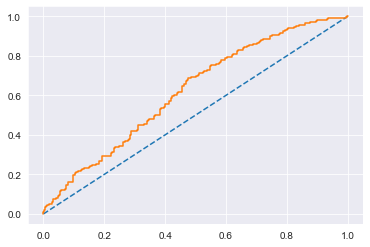

In [356]:
fpr, tpr, threshold = roc_curve(ground_truth, predicted_results_probfor1)
plt.plot([0,1],[0,1], linestyle = '--')
plt.plot(fpr, tpr)

In [357]:
roc_auc_score(ground_truth, predicted_results_probfor1)

0.6200689746650749